In [1]:
import pandas as pd

# Headers from the horse-colic.names.txt file
data_headers = ['had_surgery','age','hospital_number','rectal_temp','pulse',
    'resp_rate','temp_of_extremities','peripheral_pulse','mucous_membrane',
    'capillary_refill_time','pain','peristalsis','abdominal_distension',
    'nasogastric_tube','nasogastric_reflux','nasogastric_reflux_PH',
    'rectal_examination_feces','abdomen','packed_cell_volume','total_protein',
    'abdominocentesis_appearance','abdomcentesis_total_protein','outcome',
    'had_surgical_lesion','lesion_site','lesion_type','lesion_subtype',
    'lesion_specific_code','cp_data']

# Load the dataset
data = pd.read_csv('data/horse-colic.data.csv',sep=' ',names=data_headers)

# The cp_data column contains no data, can delete this.
data = data.drop('cp_data',axis=1)

print(data.head())

  had_surgery  age  hospital_number rectal_temp pulse resp_rate  \
0           2    1           530101       38.50    66        28   
1           1    1           534817        39.2    88        20   
2           2    1           530334       38.30    40        24   
3           1    9          5290409       39.10   164        84   
4           2    1           530255       37.30   104        35   

  temp_of_extremities peripheral_pulse mucous_membrane capillary_refill_time  \
0                   3                3               ?                     2   
1                   ?                ?               4                     1   
2                   1                1               3                     1   
3                   4                1               6                     2   
4                   ?                ?               6                     2   

   ... packed_cell_volume total_protein abdominocentesis_appearance  \
0  ...              45.00          8.40      

In [2]:
import numpy as np

data[data == '?'] = np.nan
data.astype(float)
data.head()

print('Dataset size: ', data.shape)

# First identify null or missing data
print(data.isnull().sum())
num_missing_data = data.isnull().any(axis=1).sum()
print('Total empty data points: ', num_missing_data)

Dataset size:  (300, 28)
had_surgery                      1
age                              0
hospital_number                  0
rectal_temp                     60
pulse                           24
resp_rate                       58
temp_of_extremities             56
peripheral_pulse                69
mucous_membrane                 47
capillary_refill_time           32
pain                            55
peristalsis                     44
abdominal_distension            56
nasogastric_tube               104
nasogastric_reflux             106
nasogastric_reflux_PH          247
rectal_examination_feces       102
abdomen                        118
packed_cell_volume              29
total_protein                   33
abdominocentesis_appearance    165
abdomcentesis_total_protein    198
outcome                          1
had_surgical_lesion              0
lesion_site                      0
lesion_type                      0
lesion_subtype                   0
lesion_specific_code          

In [4]:
missing_had_surgery = data[data.had_surgery.isnull()]
data = data.drop(missing_had_surgery.index)

# First identify null or missing data
print(data.isnull().sum())
num_missing_data = data.isnull().any(axis=1).sum()
print('Total empty data points: ', num_missing_data)

had_surgery                      0
age                              0
hospital_number                  0
rectal_temp                     60
pulse                           24
resp_rate                       58
temp_of_extremities             56
peripheral_pulse                69
mucous_membrane                 47
capillary_refill_time           32
pain                            55
peristalsis                     44
abdominal_distension            56
nasogastric_tube               104
nasogastric_reflux             106
nasogastric_reflux_PH          246
rectal_examination_feces       102
abdomen                        118
packed_cell_volume              29
total_protein                   33
abdominocentesis_appearance    165
abdomcentesis_total_protein    198
outcome                          0
had_surgical_lesion              0
lesion_site                      0
lesion_type                      0
lesion_subtype                   0
lesion_specific_code             0
dtype: int64
Total e

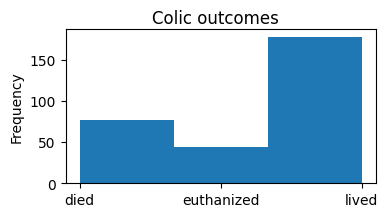

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Get the label column
label = data['outcome']

# Create a figure for 2 subplots (2 rows, 1 col)
fig, ax = plt.subplots(1,1,figsize = (4,2))

# Plot a histogram of the label
ax.hist(label,bins=3)
ax.set_ylabel('Frequency')
ax.set_xticks([0,1,2])
ax.set_xticklabels(['died','euthanized','lived'])

# Add title
fig.suptitle('Colic outcomes')

# Show the figure
plt.show()